In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install colorama
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud




nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt_tab')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [7]:
# df = pd.read_csv("/content/all-data.csv")
df = pd.read_csv('/content/drive/MyDrive/Môn Chuyên đề 1/all-data.csv')
df.head()

,sentiment,Message
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [8]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    tokens = word_tokenize(text)

    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]

    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

df["Clean_Text"] = df["Message"].apply(clean)

In [9]:
df1 = df.copy()

analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

                                          Clean_Text  Vader_Score Sentiment
0  accord gran compani plan move product russia a...       0.0000   neutral
1  technopoli plan develop stage area less squar ...       0.0000   neutral
2  intern electron industri compani elcoteq laid ...       0.0000   neutral
3  new product plant compani would increas capac ...       0.3400  positive
4  accord compani updat strategi year baswar targ...       0.6705  positive


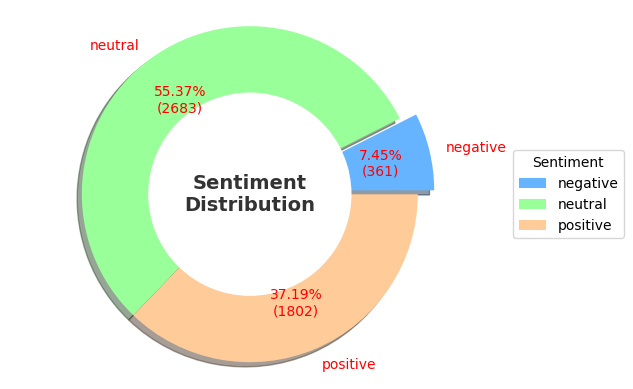

In [10]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.1, 0, 0)

sentiment_counts = df1.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

In [11]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,eur,1015
1,compani,971
2,oper,571
3,said,544
4,mn,515
5,finnish,513
6,sale,501
7,million,441
8,share,438
9,profit,430


In [12]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_df,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()

In [13]:
Positive_sent = df1[df1['Sentiment'] == 'positive']
Negative_sent = df1[df1['Sentiment'] == 'negative']
Neutral_sent = df1[df1['Sentiment'] == 'neutral']

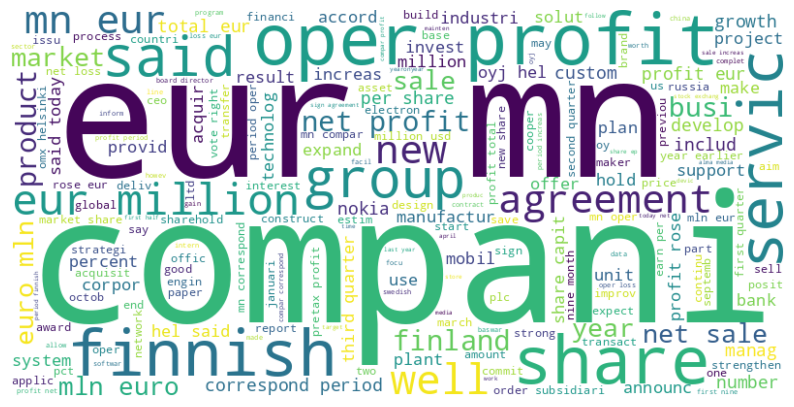

In [14]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

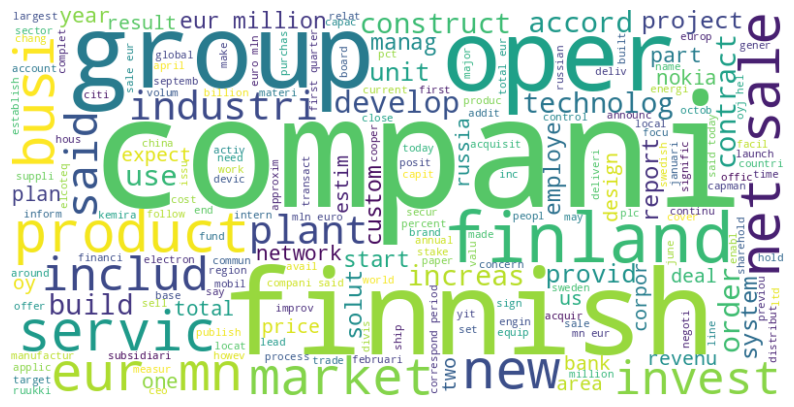

In [15]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

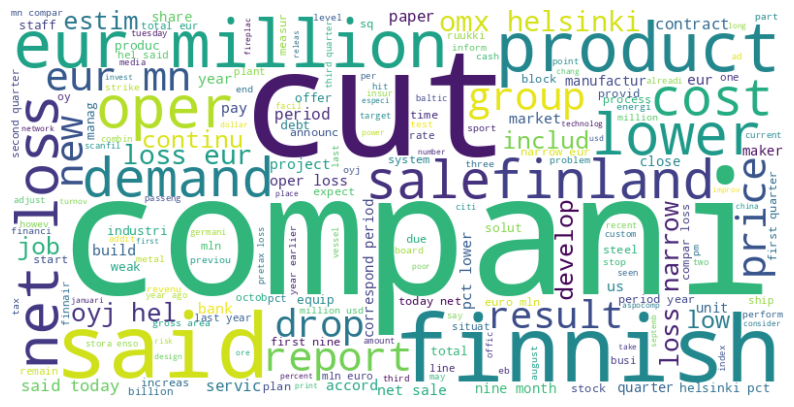

In [16]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
df2 = df.copy()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [19]:
X = df2['Clean_Text'].values
y = df2['sentiment'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:
pac_classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
pac_classifier.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50, random_state=42)

In [23]:
y_pred = pac_classifier.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

In [24]:
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)

Test Set Results:
Accuracy: 0.7010309278350515
Classification Report:
               precision    recall  f1-score   support

    negative       0.54      0.54      0.54       110
     neutral       0.77      0.79      0.78       571
    positive       0.61      0.58      0.60       289

    accuracy                           0.70       970
   macro avg       0.64      0.64      0.64       970
weighted avg       0.70      0.70      0.70       970



In [25]:
logistic_classifier = LogisticRegression(max_iter=50, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=50, random_state=42)

In [26]:
y_pred_logistic = logistic_classifier.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

In [27]:
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Results:
Accuracy: 0.7536082474226804
Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.46      0.58       110
     neutral       0.74      0.95      0.83       571
    positive       0.79      0.48      0.60       289

    accuracy                           0.75       970
   macro avg       0.77      0.63      0.67       970
weighted avg       0.76      0.75      0.73       970



In [28]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred_rf = random_forest_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

In [30]:
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rep_rf)


Random Forest Results:
Accuracy: 0.7505154639175258
Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.45      0.55       110
     neutral       0.75      0.95      0.84       571
    positive       0.76      0.48      0.59       289

    accuracy                           0.75       970
   macro avg       0.75      0.62      0.66       970
weighted avg       0.75      0.75      0.73       970



In [31]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [32]:
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

In [33]:
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)

Support Vector Machine Results:
Accuracy: 0.7556701030927835
Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.56      0.63       110
     neutral       0.76      0.91      0.83       571
    positive       0.74      0.53      0.62       289

    accuracy                           0.76       970
   macro avg       0.74      0.67      0.69       970
weighted avg       0.75      0.76      0.74       970



In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time

# Khởi tạo danh sách các mô hình
models = {
    "Logistic Regression": LogisticRegression(max_iter=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=50, random_state=42)
}

# Danh sách để lưu kết quả
results = []

# Huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    start_time = time.time()  # Bắt đầu đo thời gian huấn luyện

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    end_time = time.time()  # Kết thúc đo thời gian huấn luyện
    training_time = round(end_time - start_time, 4)  # Tính thời gian huấn luyện

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)  # Chuyển thành dict

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(classification_rep['weighted avg']['precision'], 4),
        "Recall": round(classification_rep['weighted avg']['recall'], 4),
        "F1-Score": round(classification_rep['weighted avg']['f1-score'], 4),
        "Training Time (s)": training_time
    })

# Tạo DataFrame kết quả
df_results = pd.DataFrame(results)

# Định dạng số thập phân cho các cột số
numeric_columns = ["Accuracy", "Precision", "Recall", "F1-Score", "Training Time (s)"]
for col in numeric_columns:
    df_results[col] = df_results[col].round(4)

# Hàm làm nổi bật giá trị tốt nhất và thấp nhất
def highlight_minmax(s):
    is_max = s == s.max()
    is_min = s == s.min()
    background = ['background-color: #90EE90' if v else 'background-color: #FF9999' if m else '' for v, m in zip(is_max, is_min)]
    return background

# Tạo bảng với định dạng đẹp
styled_df = df_results.style \
    .apply(highlight_minmax, subset=["Accuracy", "Precision", "Recall", "F1-Score"]) \
    .format({col: "{:.4f}" for col in numeric_columns}) \
    .set_properties(**{
        'text-align': 'center',
        'padding': '10px',
        'border': '1px solid #ddd'
    }) \
    .set_table_styles([
        {'selector': 'th',
         'props': [
             ('background-color', '#4CAF50'),
             ('color', 'white'),
             ('font-weight', 'bold'),
             ('text-align', 'center'),
             ('padding', '12px'),
             ('border', '1px solid #ddd')
         ]},
        {'selector': 'caption',
         'props': [
             ('caption-side', 'top'),
             ('font-size', '16px'),
             ('font-weight', 'bold'),
             ('color', '#333'),
             ('padding', '10px')
         ]},
        {'selector': 'td',
         'props': [
             ('padding', '8px'),
             ('border', '1px solid #ddd')
         ]}
    ]) \
    .set_caption('So sánh hiệu suất các mô hình')

# Hiển thị bảng
display(styled_df)

,Model,Accuracy,Precision,Recall,F1-Score,Training Time (s)
0,Logistic Regression,0.7536,0.7611,0.7536,0.7342,2.0359
1,Random Forest,0.7505,0.7512,0.7505,0.7303,4.5513
2,SVM,0.7557,0.7526,0.7557,0.7439,3.2439
3,Passive Aggressive,0.7010,0.6986,0.7010,0.6996,0.0680


<Figure size 1200x800 with 0 Axes>

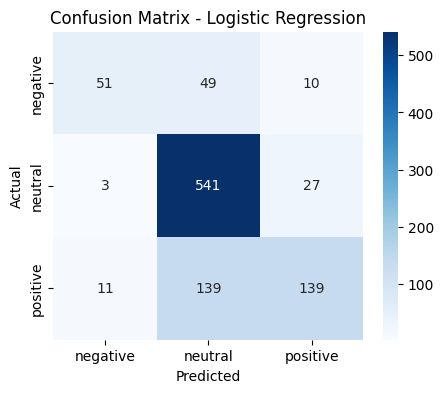

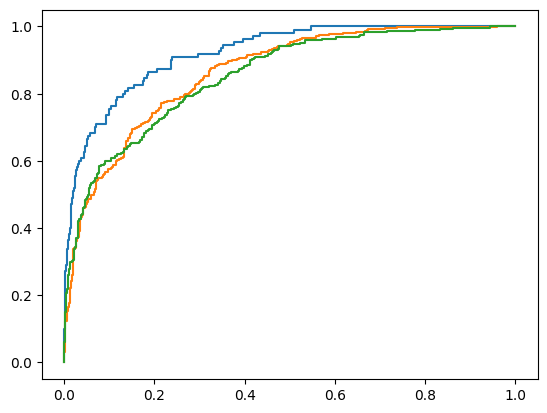

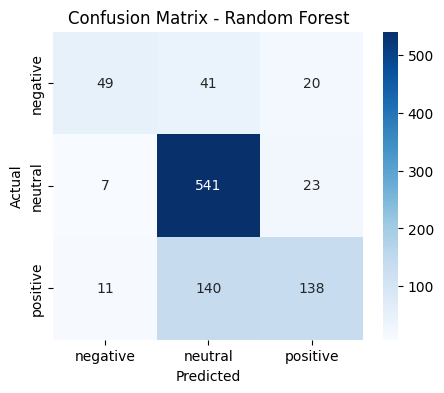

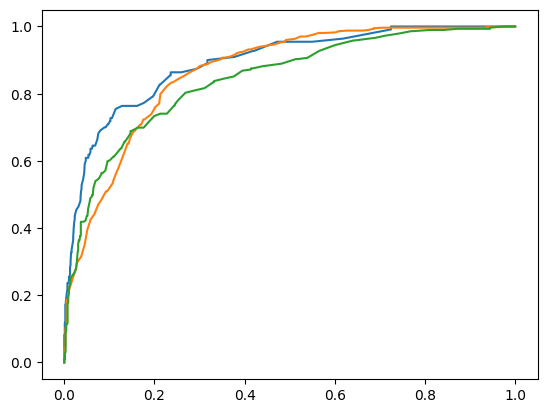

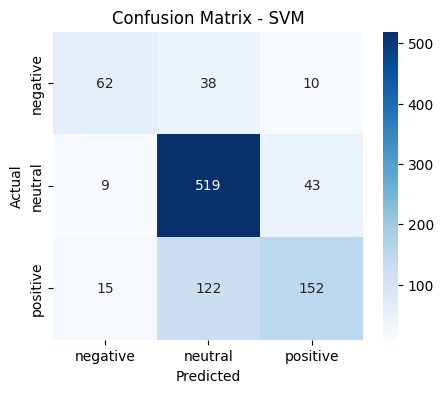

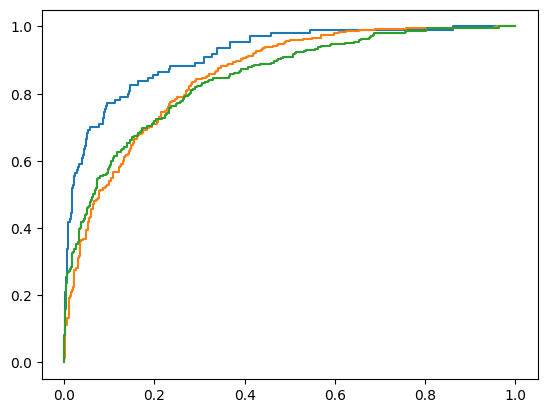

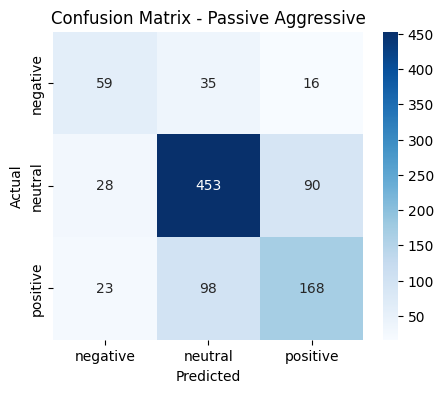

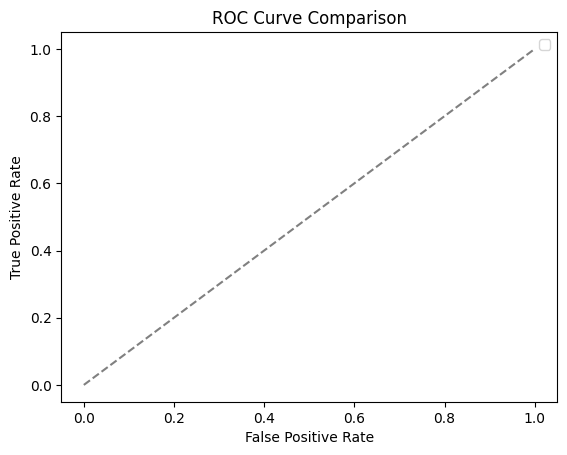

                 Model  Accuracy  Precision  Recall  F1-Score  \
0  Logistic Regression    0.7536     0.7611  0.7536    0.7342   
1        Random Forest    0.7505     0.7512  0.7505    0.7303   
2                  SVM    0.7557     0.7526  0.7557    0.7439   
3   Passive Aggressive    0.7010     0.6986  0.7010    0.6996   

   Training Time (s)  
0             1.6651  
1             3.9313  
2            12.5658  
3             0.0430  


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import time
import numpy as np

# Khởi tạo danh sách các mô hình
models = {
    "Logistic Regression": LogisticRegression(max_iter=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=50, random_state=42)
}

# Danh sách để lưu kết quả
results = []
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Chuyển thành nhãn nhị phân nếu có nhiều lớp

plt.figure(figsize=(12, 8))  # Tạo figure để hiển thị tất cả các ROC Curves

# Huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    start_time = time.time()

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    end_time = time.time()
    training_time = round(end_time - start_time, 4)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Lưu kết quả vào danh sách
    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(classification_rep['weighted avg']['precision'], 4),
        "Recall": round(classification_rep['weighted avg']['recall'], 4),
        "F1-Score": round(classification_rep['weighted avg']['f1-score'], 4),
        "Training Time (s)": training_time
    })

    # ROC Curve (Chỉ vẽ nếu có xác suất dự đoán)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_tfidf)
        n_classes = y_test_bin.shape[1]

    # Tính ROC cho từng class
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{name} - Class {i} (AUC = {roc_auc:.2f})")

# Hoàn thiện đồ thị ROC Curve
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Đường chéo
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Tạo DataFrame để hiển thị kết quả
df_results = pd.DataFrame(results)
print(df_results)


In [36]:
print("Shape of y_test_bin:", y_test_bin.shape)
print("Shape of y_proba:", y_proba.shape)

Shape of y_test_bin: (970, 3)
Shape of y_proba: (970, 3)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5933 - loss: 0.5718 - val_accuracy: 0.6598 - val_loss: 0.4640
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6914 - loss: 0.4244 - val_accuracy: 0.6969 - val_loss: 0.4250
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7834 - loss: 0.3103 - val_accuracy: 0.7412 - val_loss: 0.4107
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8960 - loss: 0.1893 - val_accuracy: 0.7546 - val_loss: 0.4525
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9267 - loss: 0.1385 - val_accuracy: 0.7309 - val_loss: 0.5013
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step
Accuracy: 0.7309
              precision    recall  f1-score   support

    negative       0.75      0.48      0.59       110
     neutral       0.77      0.86      0.81       571
    positive       0.63      0.57      0.60       289

    accuracy                           0.73       970
   macro avg       0.72      0.64      

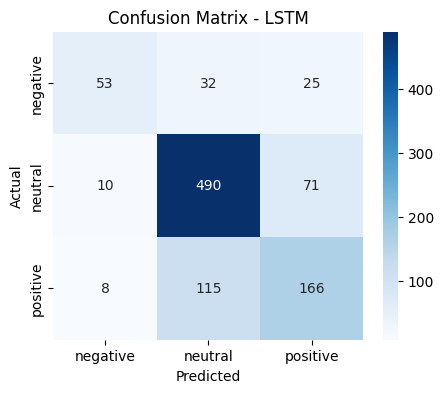

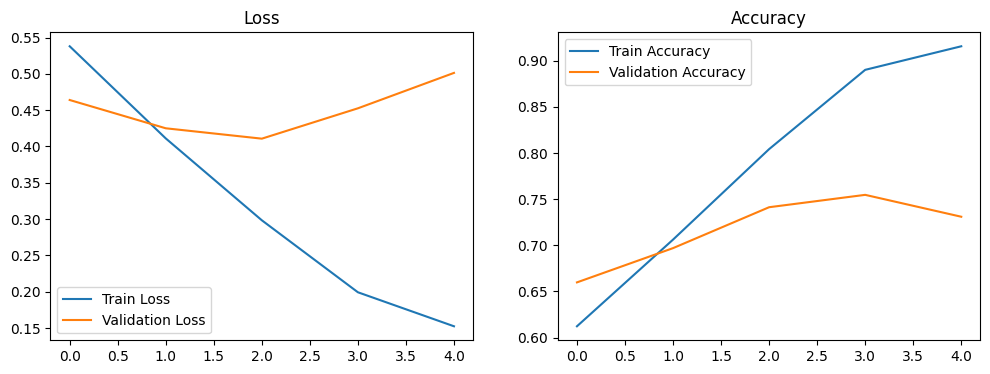

In [38]:
X = df2['Clean_Text'].values
y = df2['sentiment'].values

# Chuyển đổi nhãn từ string sang số (0, 1, 2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # y bây giờ là số (0, 1, 2)

# Chuyển đổi nhãn thành one-hot encoding
y = to_categorical(y, num_classes=3)  # Chuyển thành one-hot encoding

# Tokenize và padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Xây dựng mô hình LSTM
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))  # Thêm một lớp LSTM
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Đánh giá mô hình
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Chuyển one-hot encoding về lớp dự đoán
y_test_classes = np.argmax(y_test, axis=1)  # Chuyển one-hot encoding về lớp thực tế

# Tính các chỉ số đánh giá
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM")
plt.show()

# Vẽ đồ thị loss và accuracy trong quá trình huấn luyện
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step - accuracy: 0.5938 - loss: 0.9224 - val_accuracy: 0.6763 - val_loss: 0.7399
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 240s 4s/step - accuracy: 0.7247 - loss: 0.6234 - val_accuracy: 0.7309 - val_loss: 0.6439
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.8677 - loss: 0.3676 - val_accuracy: 0.7464 - val_loss: 0.7008
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.9143 - loss: 0.2376 - val_accuracy: 0.7340 - val_loss: 0.7710
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.9471 - loss: 0.1605 - val_accuracy: 0.7113 - val_loss: 0.9350
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 610ms/step
Accuracy: 0.7113
              precision    recall  f1-score   support

    negative       0.64      0.62      0.63       110
     neutral       0.78      0.81      0.80       571
    positive       0.59      0.55      0.57       289

    accuracy                           0.71       970
   macro avg       0.67      0.66      

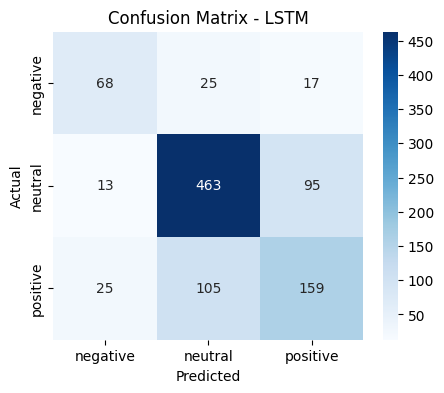

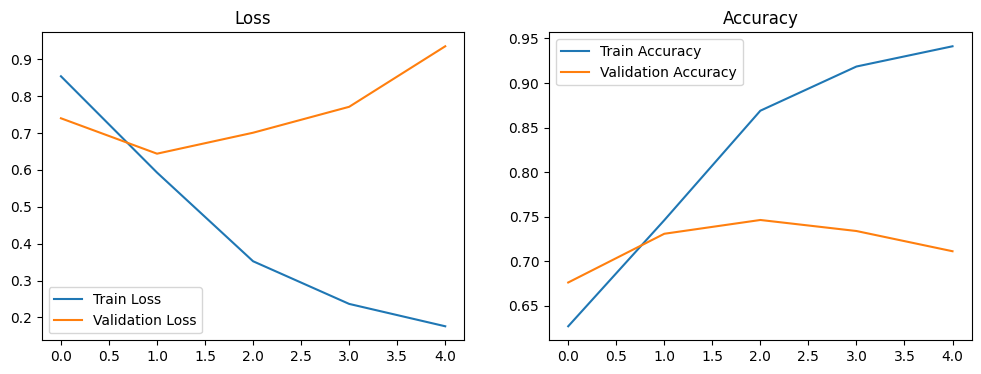

In [39]:
# prompt: build Bidirectional LSTM

import time
from sklearn.preprocessing import LabelEncoder, label_binarize
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (Your existing code) ...

# Xây dựng mô hình Bidirectional LSTM
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(Bidirectional(LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))) # Bidirectional LSTM layer
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2))) # Bidirectional LSTM layer
model.add(Dense(3, activation='softmax'))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Đánh giá mô hình
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Chuyển one-hot encoding về lớp dự đoán
y_test_classes = np.argmax(y_test, axis=1)  # Chuyển one-hot encoding về lớp thực tế

# Tính các chỉ số đánh giá
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM")
plt.show()

# Vẽ đồ thị loss và accuracy trong quá trình huấn luyện
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()


Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.5902 - loss: 0.9322 - val_accuracy: 0.6732 - val_loss: 0.7465
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7376 - loss: 0.5977 - val_accuracy: 0.7351 - val_loss: 0.6652
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8714 - loss: 0.3346 - val_accuracy: 0.7361 - val_loss: 0.7320
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9075 - loss: 0.2450 - val_accuracy: 0.7351 - val_loss: 0.8537
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.9438 - loss: 0.1551 - val_accuracy: 0.7206 - val_loss: 0.9948
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step
Accuracy: 0.7206
              precision    recall  f1-score   support

    negative       0.62      0.65      0.63       110
     neutral       0.80      0.78      0.79       571
    positive       0.61      0.64      0.62       289

    accuracy                           0.72       970
   macro avg       0.68      0.69      0.6

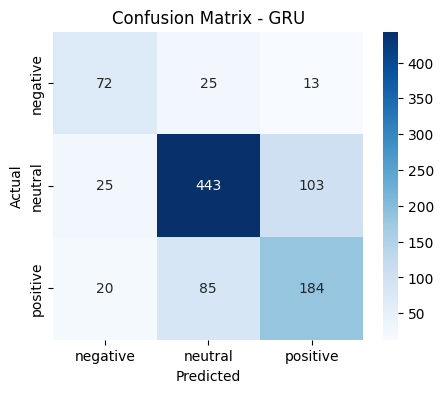

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [40]:
# prompt: Thử GRU (nhẹ hơn LSTM)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# ... (Your existing code) ...

# Xây dựng mô hình GRU
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(GRU(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))  # GRU layer
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))  # GRU layer
model.add(Dense(3, activation='softmax'))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Đánh giá mô hình
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Tính các chỉ số đánh giá
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GRU")
plt.show()

# Vẽ đồ thị loss và accuracy
plt.figure(figsize=(12, 4))
# ... (rest of the plotting code)
